# Netflix EDA

In [82]:
#Importing the required libraries

import numpy as np
import pandas as pd

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Importing our Data

In [83]:
#Reading our data into a pandas dataframe

titles_dataframe = pd.read_csv("../Netflix_EDA/Netflix_Data/titles.csv")
credits_dataframe = pd.read_csv("../Netflix_EDA/Netflix_Data/credits.csv")

In [84]:
print("titles:",titles_dataframe.shape)

titles: (5806, 15)


In [85]:
titles_dataframe.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [86]:
titles_dataframe.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [87]:
titles_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [88]:
#Checking for missing values
titles_dataframe.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [89]:
#Checking for duplicate values
titles_dataframe.duplicated().sum()

0

In [90]:
print("credits:",credits_dataframe.shape)

credits: (77213, 5)


In [91]:
credits_dataframe.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [92]:
credits_dataframe.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [93]:
credits_dataframe.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [94]:
credits_dataframe.duplicated().sum()

0

## Dealing with missing values

### Seasons

In [95]:
#Show rows where seasons are missing and type == "SHOW"
titles_dataframe[titles_dataframe["type"] == "SHOW"].seasons.isnull().sum()

0

We can see that all the shows have a valid seasons count.

In [96]:
titles_dataframe[titles_dataframe["type"] == "MOVIE"].seasons.isnull().sum()

3759

All the movie titles have the seasons column as NULL. <br>
So, we impute this value as 0.

In [97]:
#Fill the missing seasons with 0
titles_dataframe["seasons"].fillna(0, inplace=True)

### IMDB and TMDB score

c:\Users\anand\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


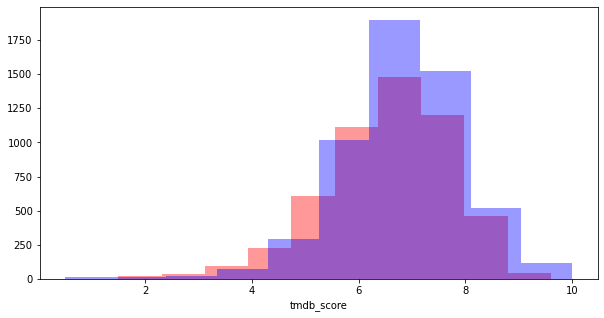

In [98]:
#plot the distribution of imdb_score and tmdb_score
plt.figure(figsize=(10,5))
sns.distplot(titles_dataframe["imdb_score"], bins=10, kde=False, color="red")
sns.distplot(titles_dataframe["tmdb_score"], bins=10, kde=False, color="blue")
plt.show()


In [99]:
titles_dataframe.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,5806.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,0.763520,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,1.876199,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,0.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,0.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,0.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,1.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


We can see that the imdb_score and the tmdb_score values are quite similar. <br>
They have similar mean and std deviation values. <br>
Therefore, we can use one to impute the other

In [100]:
#Show rows where both imdb_score and tmdb_score are missing
titles_dataframe[titles_dataframe["imdb_score"].isnull() & titles_dataframe["tmdb_score"].isnull()].shape

(90, 15)

We can see that there are 90 titles where both the imdb_score and the tmdb_score are NULL.<br>
We will drop these titles from our dataset.

In [101]:
#In rows where imdb_score is missing, replace it with the tmdb_score of that row
titles_dataframe.loc[titles_dataframe["imdb_score"].isnull(), "imdb_score"] = titles_dataframe.loc[titles_dataframe["imdb_score"].isnull(), "tmdb_score"]

In [102]:
#In rows where tmdb_score is missing, replace it with the imdb_score of that row
titles_dataframe.loc[titles_dataframe["tmdb_score"].isnull(), "tmdb_score"] = titles_dataframe.loc[titles_dataframe["tmdb_score"].isnull(), "imdb_score"]

In [103]:
#Drop the rows with missing values in imdb_score or tmdb_score
titles_dataframe.dropna(subset=["imdb_score", "tmdb_score"], inplace=True)

### Age Certification

In [104]:
#Show unique values in the age_certification column
# titles_dataframe["age_certification"].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

### Age Certification values sorted from younger to older requirements

TV-Y : 0(children) - 0<br>
TV-Y7 : 7(children) - 1<br>
PG-13 : 13(children) - 2<br>
TV-14 : 14(children) - 3<br>
TV-PG : 14(children) - 3<br>
PG : 15(children) - 4<br>
TV-G : 0(all) - 5<br>
G : 0 (adults) - 6<br>
R : 15(adults) - 7<br>
TV-MA : 17(adults) - 8<br>
NC-17 : 18(adults) - 9<br>

In [105]:
# age_value_dict = {'TV-Y': 0, 'TV-Y7': 1, 'PG-13': 2, 'TV-14': 3, 'TV-PG': 3, 'PG': 4, 'TV-G': 5, 'G': 6, 'R': 7, 'TV-MA': 8, 'NC-17': 9}

In [106]:
# titles_dataframe = titles_dataframe.replace({"age_certification": age_value_dict})

In [107]:
# titles_dataframe.age_certification.unique()

array([ 7.,  4.,  3.,  6.,  2., nan,  8.,  0.,  5.,  1.,  9.])

Now, the goal is to calculate the average age_certification score of each director and impute that value into the dataframe where the age_certification values are missing

In [108]:
# credits_dataframe[credits_dataframe["role"] == "DIRECTOR"].head()

,person_id,id,name,character,role
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR
83,11475,tm127384,Terry Jones,NaN,DIRECTOR
84,11473,tm127384,Terry Gilliam,NaN,DIRECTOR
106,11475,tm70993,Terry Jones,NaN,DIRECTOR
148,14255,tm190788,William Friedkin,NaN,DIRECTOR


In [109]:
# directors_dataframe = credits_dataframe[credits_dataframe["role"] == "DIRECTOR"].copy()
# #drop the columns character and role
# directors_dataframe.drop(columns=["character", "role"], inplace=True)

In [110]:
# directors_dataframe.shape

(4523, 3)

In [111]:
# print("There are ",len(directors_dataframe.name.unique()) , " directors who have their movies on Netflix")

There are  3417  directors who have their movies on Netflix


In [112]:
# directors_dataframe.head()

,person_id,id,name
36,3308,tm84618,Martin Scorsese
83,11475,tm127384,Terry Jones
84,11473,tm127384,Terry Gilliam
106,11475,tm70993,Terry Jones
148,14255,tm190788,William Friedkin


In [121]:
#create a dictionary that gets id:age_certificaton from titles_dataframe
# id_age_dict = {}
# for index, row in titles_dataframe.iterrows():
#     id_age_dict[row["id"]] = row["age_certification"]
    

In [122]:
#add a row age_certification to directors_dataframe
# directors_dataframe["age_certification"] = directors_dataframe["id"].map(id_age_dict)

In [123]:
# directors_dataframe.head()

,person_id,id,name,age_certification
36,3308,tm84618,Martin Scorsese,7.0
83,11475,tm127384,Terry Jones,4.0
84,11473,tm127384,Terry Gilliam,4.0
106,11475,tm70993,Terry Jones,7.0
148,14255,tm190788,William Friedkin,7.0


In [124]:
# directors_dataframe.isnull().sum()

person_id               0
id                      0
name                    0
age_certification    2537
dtype: int64

In [125]:
#drop rows will null values in the age_certification column
# directors_dataframe.dropna(subset=["age_certification"], inplace=True)

In [ ]:
# 